# Work
請將 Epoch 加到 500 個，並觀察 learning curve 的走勢  
請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model
model = build_mlp()

W0824 15:26:47.160904 22124 deprecation_wrapper.py:119] From C:\Coding\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0824 15:26:47.180732 22124 deprecation_wrapper.py:119] From C:\Coding\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0824 15:26:47.184713 22124 deprecation_wrapper.py:119] From C:\Coding\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [5]:
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.SGD(lr=0.01)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0824 15:26:47.329912 22124 deprecation_wrapper.py:119] From C:\Coding\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0824 15:26:47.337913 22124 deprecation_wrapper.py:119] From C:\Coding\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_11 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total para

In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0824 15:26:47.944326 22124 deprecation.py:323] From C:\Coding\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0824 15:26:48.000350 22124 deprecation_wrapper.py:119] From C:\Coding\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 9s 181us/step - loss: 2.1790 - acc: 0.1974 - val_loss: 2.0661 - val_acc: 0.2500
Epoch 2/500
50000/50000 [==============================] - 5s 106us/step - loss: 1.9770 - acc: 0.2911 - val_loss: 2.1036 - val_acc: 0.2319
Epoch 3/500
50000/50000 [==============================] - 5s 107us/step - loss: 1.8791 - acc: 0.3302 - val_loss: 1.8427 - val_acc: 0.3409
Epoch 4/500
50000/50000 [==============================] - 5s 105us/step - loss: 1.8227 - acc: 0.3537 - val_loss: 1.8761 - val_acc: 0.3275
Epoch 5/500
50000/50000 [==============================] - 5s 105us/step - loss: 1.7815 - acc: 0.3681 - val_loss: 1.7507 - val_acc: 0.3761
Epoch 6/500
50000/50000 [==============================] - 5s 106us/step - loss: 1.7384 - acc: 0.3825 - val_loss: 2.0326 - val_acc: 0.2924
Epoch 7/500
50000/50000 [==============================] - 5s 106us/step - loss: 1.7120 - acc: 0.3909 - val_loss: 1.

50000/50000 [==============================] - 5s 105us/step - loss: 1.1147 - acc: 0.6047 - val_loss: 1.3705 - val_acc: 0.5069
Epoch 60/500
50000/50000 [==============================] - 5s 105us/step - loss: 1.1093 - acc: 0.6081 - val_loss: 1.3702 - val_acc: 0.5189
Epoch 61/500
50000/50000 [==============================] - 5s 106us/step - loss: 1.0940 - acc: 0.6136 - val_loss: 1.4139 - val_acc: 0.5039
Epoch 62/500
50000/50000 [==============================] - 5s 107us/step - loss: 1.0914 - acc: 0.6146 - val_loss: 1.4573 - val_acc: 0.4987
Epoch 63/500
50000/50000 [==============================] - 5s 105us/step - loss: 1.0864 - acc: 0.6148 - val_loss: 1.7508 - val_acc: 0.4205
Epoch 64/500
50000/50000 [==============================] - 5s 106us/step - loss: 1.0788 - acc: 0.6188 - val_loss: 1.4119 - val_acc: 0.5152
Epoch 65/500
50000/50000 [==============================] - 5s 106us/step - loss: 1.0656 - acc: 0.6232 - val_loss: 1.4459 - val_acc: 0.4976
Epoch 66/500
50000/50000 [=======

50000/50000 [==============================] - 5s 107us/step - loss: 0.6969 - acc: 0.7554 - val_loss: 1.5306 - val_acc: 0.5313
Epoch 118/500
50000/50000 [==============================] - 5s 106us/step - loss: 0.6726 - acc: 0.7627 - val_loss: 1.7506 - val_acc: 0.4974
Epoch 119/500
50000/50000 [==============================] - 5s 106us/step - loss: 0.6654 - acc: 0.7656 - val_loss: 1.6284 - val_acc: 0.5294
Epoch 120/500
50000/50000 [==============================] - 5s 105us/step - loss: 0.6591 - acc: 0.7687 - val_loss: 1.6308 - val_acc: 0.5172
Epoch 121/500
50000/50000 [==============================] - 5s 106us/step - loss: 0.6454 - acc: 0.7715 - val_loss: 1.8422 - val_acc: 0.4791
Epoch 122/500
50000/50000 [==============================] - 5s 105us/step - loss: 0.6396 - acc: 0.7716 - val_loss: 1.7258 - val_acc: 0.4837
Epoch 123/500
50000/50000 [==============================] - 5s 105us/step - loss: 0.6413 - acc: 0.7735 - val_loss: 1.6832 - val_acc: 0.5054
Epoch 124/500
50000/50000 [

50000/50000 [==============================] - 5s 105us/step - loss: 0.3015 - acc: 0.8995 - val_loss: 3.1518 - val_acc: 0.4118
Epoch 176/500
50000/50000 [==============================] - 5s 105us/step - loss: 0.3792 - acc: 0.8803 - val_loss: 2.3166 - val_acc: 0.5120
Epoch 177/500
50000/50000 [==============================] - 5s 105us/step - loss: 0.2589 - acc: 0.9150 - val_loss: 2.2579 - val_acc: 0.5101
Epoch 178/500
50000/50000 [==============================] - 5s 105us/step - loss: 0.2757 - acc: 0.9083 - val_loss: 2.2160 - val_acc: 0.5232
Epoch 179/500
50000/50000 [==============================] - 5s 105us/step - loss: 0.3727 - acc: 0.8885 - val_loss: 2.3695 - val_acc: 0.5048
Epoch 180/500
50000/50000 [==============================] - 5s 105us/step - loss: 0.3286 - acc: 0.8938 - val_loss: 2.5164 - val_acc: 0.4965
Epoch 181/500
50000/50000 [==============================] - 5s 105us/step - loss: 0.4242 - acc: 0.8809 - val_loss: 1.8949 - val_acc: 0.4410
Epoch 182/500
50000/50000 [

50000/50000 [==============================] - 5s 104us/step - loss: 0.2192 - acc: 0.9387 - val_loss: 2.7726 - val_acc: 0.5397
Epoch 234/500
50000/50000 [==============================] - 5s 105us/step - loss: 0.0423 - acc: 0.9923 - val_loss: 2.8885 - val_acc: 0.5310
Epoch 235/500
50000/50000 [==============================] - 5s 105us/step - loss: 0.0453 - acc: 0.9907 - val_loss: 2.8486 - val_acc: 0.5367
Epoch 236/500
50000/50000 [==============================] - 5s 105us/step - loss: 0.0366 - acc: 0.9930 - val_loss: 2.9556 - val_acc: 0.5285
Epoch 237/500
50000/50000 [==============================] - 5s 105us/step - loss: 0.0324 - acc: 0.9943 - val_loss: 2.9311 - val_acc: 0.5304
Epoch 238/500
50000/50000 [==============================] - 5s 105us/step - loss: 0.0304 - acc: 0.9950 - val_loss: 2.9316 - val_acc: 0.5389
Epoch 239/500
50000/50000 [==============================] - 5s 105us/step - loss: 0.0282 - acc: 0.9957 - val_loss: 3.0313 - val_acc: 0.5324
Epoch 240/500
50000/50000 [

50000/50000 [==============================] - 5s 108us/step - loss: 0.0037 - acc: 1.0000 - val_loss: 3.5003 - val_acc: 0.5391
Epoch 292/500
50000/50000 [==============================] - 5s 106us/step - loss: 0.0036 - acc: 1.0000 - val_loss: 3.4984 - val_acc: 0.5388
Epoch 293/500
50000/50000 [==============================] - 5s 107us/step - loss: 0.0035 - acc: 1.0000 - val_loss: 3.5131 - val_acc: 0.5394
Epoch 294/500
50000/50000 [==============================] - 5s 107us/step - loss: 0.0034 - acc: 1.0000 - val_loss: 3.5271 - val_acc: 0.5405
Epoch 295/500
50000/50000 [==============================] - 5s 106us/step - loss: 0.0034 - acc: 1.0000 - val_loss: 3.5249 - val_acc: 0.5392
Epoch 296/500
50000/50000 [==============================] - 5s 106us/step - loss: 0.0033 - acc: 1.0000 - val_loss: 3.5290 - val_acc: 0.5355
Epoch 297/500
50000/50000 [==============================] - 5s 106us/step - loss: 0.0033 - acc: 1.0000 - val_loss: 3.5413 - val_acc: 0.5370
Epoch 298/500
50000/50000 [

50000/50000 [==============================] - 5s 105us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 3.7482 - val_acc: 0.5388
Epoch 350/500
50000/50000 [==============================] - 5s 105us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 3.7496 - val_acc: 0.5385
Epoch 351/500
50000/50000 [==============================] - 5s 105us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 3.7551 - val_acc: 0.5384
Epoch 352/500
50000/50000 [==============================] - 5s 104us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 3.7583 - val_acc: 0.5389
Epoch 353/500
50000/50000 [==============================] - 5s 105us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 3.7607 - val_acc: 0.5379
Epoch 354/500
50000/50000 [==============================] - 5s 105us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 3.7664 - val_acc: 0.5408
Epoch 355/500
50000/50000 [==============================] - 5s 105us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 3.7694 - val_acc: 0.5382
Epoch 356/500
50000/50000 [

Epoch 407/500
50000/50000 [==============================] - 5s 105us/step - loss: 9.4350e-04 - acc: 1.0000 - val_loss: 3.8894 - val_acc: 0.5391
Epoch 408/500
50000/50000 [==============================] - 5s 106us/step - loss: 9.3501e-04 - acc: 1.0000 - val_loss: 3.8896 - val_acc: 0.5375
Epoch 409/500
50000/50000 [==============================] - 5s 105us/step - loss: 9.2863e-04 - acc: 1.0000 - val_loss: 3.8950 - val_acc: 0.5385
Epoch 410/500
50000/50000 [==============================] - 5s 105us/step - loss: 9.2436e-04 - acc: 1.0000 - val_loss: 3.8938 - val_acc: 0.5386
Epoch 411/500
50000/50000 [==============================] - 5s 105us/step - loss: 9.1805e-04 - acc: 1.0000 - val_loss: 3.8965 - val_acc: 0.5389
Epoch 412/500
50000/50000 [==============================] - 5s 104us/step - loss: 9.1352e-04 - acc: 1.0000 - val_loss: 3.8985 - val_acc: 0.5369
Epoch 413/500
50000/50000 [==============================] - 5s 105us/step - loss: 9.0627e-04 - acc: 1.0000 - val_loss: 3.9001 - v

50000/50000 [==============================] - 5s 105us/step - loss: 6.7346e-04 - acc: 1.0000 - val_loss: 3.9849 - val_acc: 0.5390
Epoch 464/500
50000/50000 [==============================] - 5s 105us/step - loss: 6.6998e-04 - acc: 1.0000 - val_loss: 3.9812 - val_acc: 0.5374
Epoch 465/500
50000/50000 [==============================] - 5s 104us/step - loss: 6.6496e-04 - acc: 1.0000 - val_loss: 3.9850 - val_acc: 0.5378
Epoch 466/500
50000/50000 [==============================] - 5s 105us/step - loss: 6.6306e-04 - acc: 1.0000 - val_loss: 3.9875 - val_acc: 0.5384
Epoch 467/500
50000/50000 [==============================] - 5s 105us/step - loss: 6.5900e-04 - acc: 1.0000 - val_loss: 3.9881 - val_acc: 0.5371
Epoch 468/500
50000/50000 [==============================] - 8s 166us/step - loss: 6.5502e-04 - acc: 1.0000 - val_loss: 3.9911 - val_acc: 0.5382
Epoch 469/500
50000/50000 [==============================] - 7s 137us/step - loss: 6.5185e-04 - acc: 1.0000 - val_loss: 3.9919 - val_acc: 0.5376

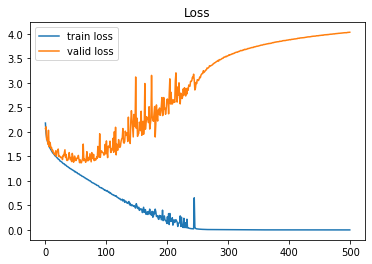

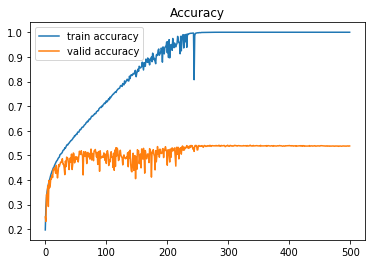

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()